In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
import sklearn
print(sklearn.__version__)


1.6.1


In [3]:
pip install scikit-learn==1.6.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable


In [5]:
data=pd.read_csv("diabetes-datasets.csv")

In [6]:
data.head()

,Pregnancies,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
print(data.dtypes)




Pregnancies       int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
Outcome           int64
dtype: object


In [8]:
import numpy as np
X = data[["Pregnancies", "glucose_conc",	"diastolic_bp",	"thickness",	"insulin",	"bmi",	"diab_pred",	"age"]].values
print("Input shape: ", X.shape)




Input shape:  (2000, 8)


In [9]:
def safe_float(value, default=0.0):
    try:
        return float(value)
    except (ValueError, TypeError):
        return default

In [10]:
Pregnancies = 3  # Example value
glucose_conc = 120
diastolic_bp = 70
thickness = 20
insulin = 80
bmi = 25.5
diab_pred = 0.5
age = 30

print(f"Pregnancies: '{Pregnancies}', glucose_conc: '{glucose_conc}', diastolic_bp: '{diastolic_bp}', thickness: '{thickness}', insulin: '{insulin}', bmi: '{bmi}', diab_pred: '{diab_pred}', age: '{age}'")


Pregnancies: '3', glucose_conc: '120', diastolic_bp: '70', thickness: '20', insulin: '80', bmi: '25.5', diab_pred: '0.5', age: '30'


In [11]:
def get_data():
    Pregnancies = 3  # Local variable
    return Pregnancies

print(get_data())  # This works
print(Pregnancies)  # This causes NameError


3
3


In [12]:
def safe_float(value, default=0.0):
    try:
        if isinstance(value, str):
            value = value.strip()  # Only strip if it's a string
        return float(value)
    except (ValueError, TypeError):
        return default


In [13]:
try:
    Pregnancies = int(input("Enter number of pregnancies: "))
except ValueError:
    print("Invalid input!")


Enter number of pregnancies:  3


In [14]:
print(type(Pregnancies), repr(Pregnancies))

<class 'int'> 3


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pregnancies   2000 non-null   int64  
 1   glucose_conc  2000 non-null   int64  
 2   diastolic_bp  2000 non-null   int64  
 3   thickness     2000 non-null   int64  
 4   insulin       2000 non-null   int64  
 5   bmi           2000 non-null   float64
 6   diab_pred     2000 non-null   float64
 7   age           2000 non-null   int64  
 8   Outcome       2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [16]:
data['Outcome'].value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [17]:
data.groupby("Outcome").mean()

,Pregnancies,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


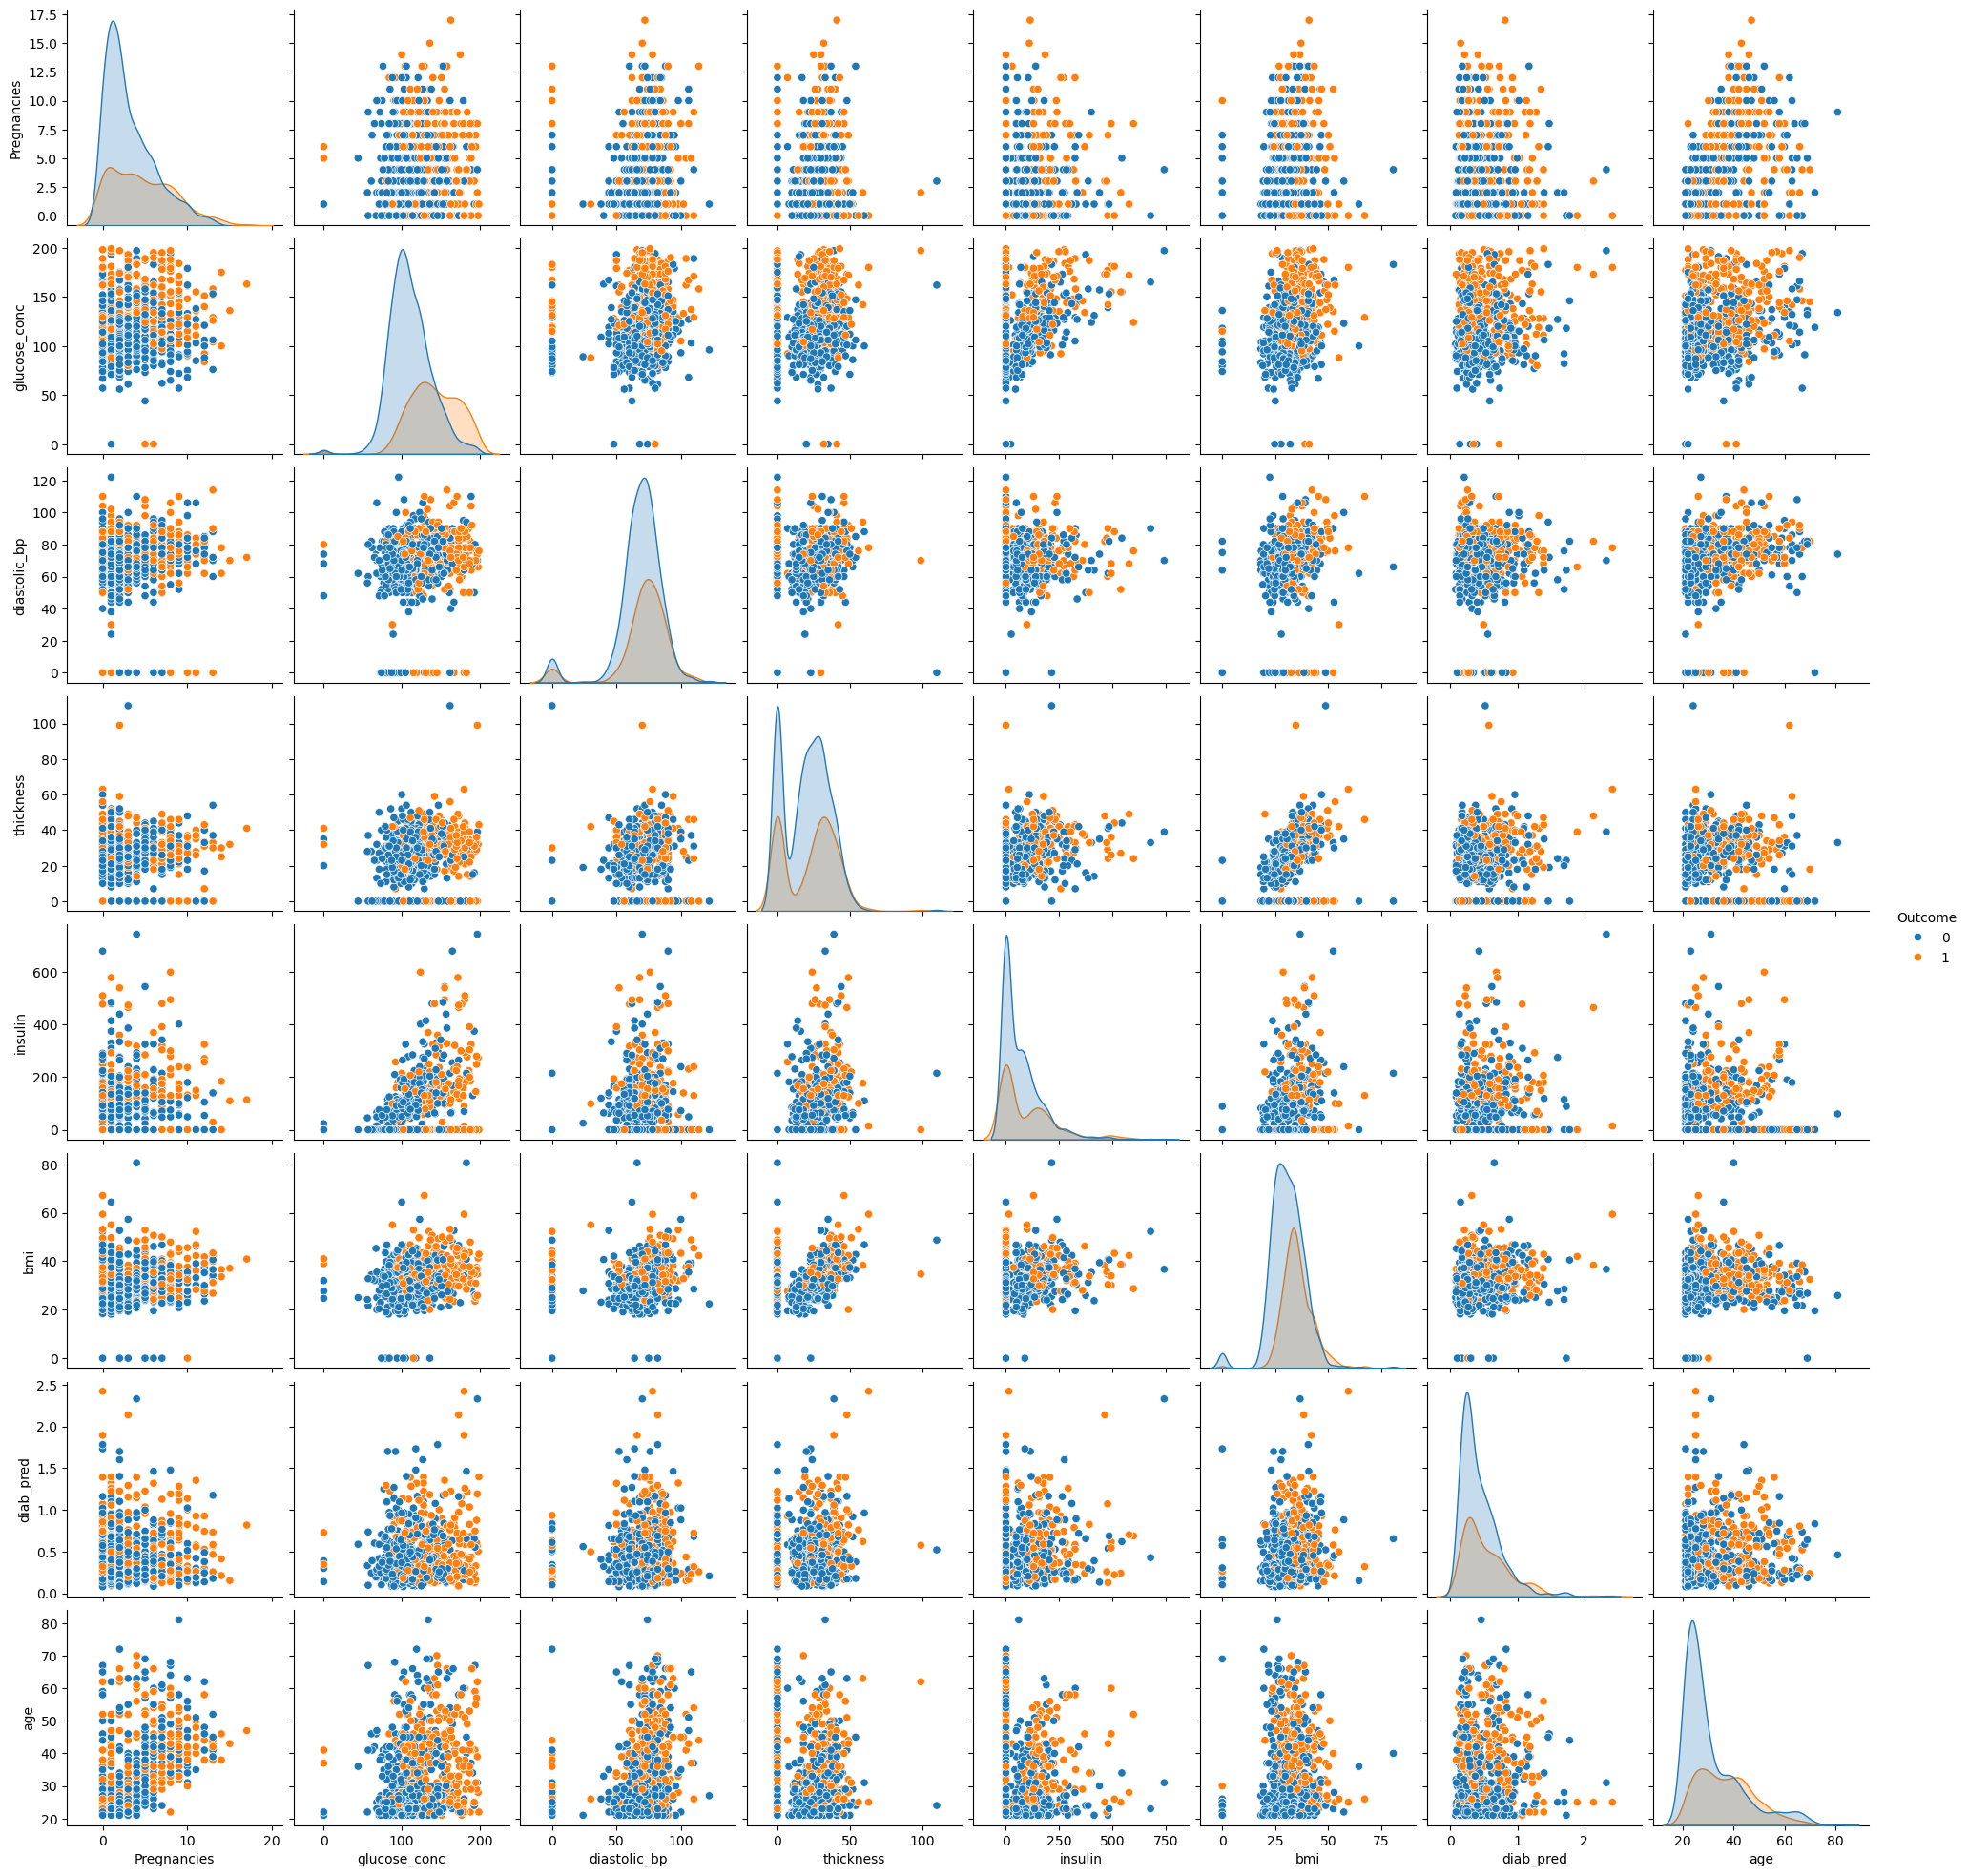

In [18]:
sns.pairplot(data, hue = 'Outcome')

In [19]:
pip install seaborn --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='glucose_conc', ylabel='Outcome'>

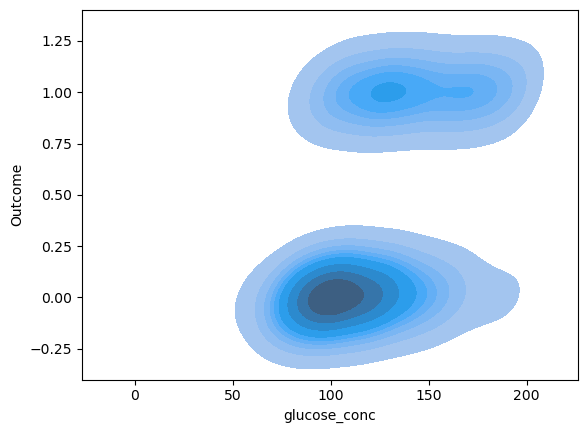

In [20]:
sns.kdeplot(x=data['glucose_conc'], y=data['Outcome'], fill = 1)

In [21]:
corr = data.corr()
corr

,Pregnancies,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
glucose_conc,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
diastolic_bp,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
thickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
bmi,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
diab_pred,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


<Axes: >

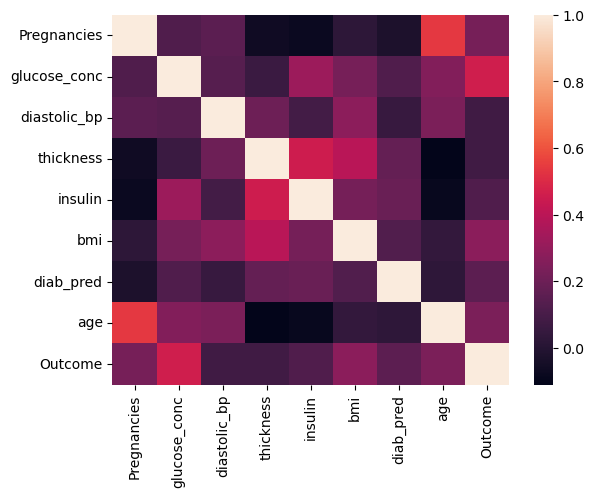

In [22]:
import seaborn as sns
sns.heatmap(corr,)

In [23]:
X=data.drop(columns = 'Outcome' ,axis=1)
Y=data['Outcome']

In [24]:
X.head()

,Pregnancies,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [25]:
Y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [26]:
X.shape

(2000, 8)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [28]:
Y_train.count()

1600

In [29]:
Y_train.value_counts()

Outcome
0    1053
1     547
Name: count, dtype: int64

In [30]:
X_train.head()

,Pregnancies,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
406,4,115,72,0,0,28.9,0.376,46
1777,1,144,82,46,180,46.1,0.335,46
1789,6,125,78,31,0,27.6,0.565,49
774,3,150,76,0,0,21.0,0.207,37
1291,8,84,74,31,0,38.3,0.457,39


In [31]:
print(X.shape,X_train.shape, X_test.shape)

(2000, 8) (1600, 8) (400, 8)


In [32]:
classifier = svm.SVC(kernel='linear')

In [33]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [34]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
X_train_prediction = classifier.predict(X_test)
training_data_accuracy = accuracy_score(X_train_prediction, Y_test)

In [36]:
training_data_accuracy

0.8025

In [37]:
input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]
[[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]]
[1]
The person is diabetic


C:\Users\chandana\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [38]:
X.columns

Index(['Pregnancies', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age'],
      dtype='object')

In [39]:
for column in X.columns:
    print(column)

Pregnancies
glucose_conc
diastolic_bp
thickness
insulin
bmi
diab_pred
age


In [44]:
# Import necessary libraries for execution
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Load the dataset
data_path = "diabetes-datasets.csv"  # Assuming the dataset is named "diabetes.csv"
data = pd.read_csv(data_path)

# Splitting data into features and target
X = data.drop(columns=["Outcome"])  # Assuming "Outcome" is the target variable
y = data["Outcome"]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
log_reg = LogisticRegression(max_iter=5000)
svm_model = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)
xgb_model = XGBClassifier(eval_metric='logloss')
adaboost_model = AdaBoostClassifier(n_estimators=100)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# Train models
log_reg.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
adaboost_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_forest = random_forest.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_ada = adaboost_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
# Accuracy scores
acc_log = accuracy_score(y_test, y_pred_log)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
acc_ada = accuracy_score(y_test, y_pred_ada) 
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print(f"Support Vector Machine Accuracy: {acc_svm:.4f}")
print(f"Decision Tree Accuracy: {acc_tree:.4f}")
print(f"Random Forest Accuracy: {acc_forest:.4f}")
print(f"XGBoost Accuracy: {acc_xgb:.4f}")
print(f"AdaBoost Accuracy: {acc_ada:.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
# Initialize and train models
models = {
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "xgb_model" : XGBClassifier(eval_metric='logloss'),
"adaboost_model" : AdaBoostClassifier(n_estimators=100),
    "gb_model" : GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Dictionary to store accuracy scores
accuracy_scores = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

accuracy_scores


Logistic Regression Accuracy: 0.7900
Support Vector Machine Accuracy: 0.7650
Decision Tree Accuracy: 0.9775
Random Forest Accuracy: 0.9900
XGBoost Accuracy: 0.9850
AdaBoost Accuracy: 0.7900
Gradient Boosting Accuracy: 0.8875


{'Support Vector Machine': 0.765,
 'Logistic Regression': 0.79,
 'Decision Tree': 0.98,
 'Random Forest': 0.99,
 'xgb_model': 0.985,
 'adaboost_model': 0.79,
 'gb_model': 0.8875}

In [ ]:
import pickle


In [ ]:
import os
import pickle

model_path = "diabetes_model.sav"

if os.path.exists(model_path):
    with open(model_path, 'rb') as file:
        diabetes_model = pickle.load(file)
else:
    print(f"❌ Error: The file '{model_path}' does not exist. Please check the file path.")


In [ ]:
diabetes_model = pickle.load(open(r"C:\Users\chandana\OneDrive\Desktop\MULTIPLEDISEASEPREDICTION\E - DOCTOR MULTI DISEASE PREDICTION\diabetes_model.sav", "rb"))


In [ ]:
pickle.dump(classifier, open('diabetes_model.sav','wb'))

In [ ]:
diabetes_model=pickle.load(open(r'diabetes_model.sav','rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = diabetes_model.predict(input_data_reshaped)
if(prediction[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")